<a href="https://colab.research.google.com/github/dani1974/DanielaRosasPUC/blob/main/daniela_rosas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Descreva o seu dataset (atributos, imagens, anotações, etc).**

  Fashion-MNIST é um conjunto de dados de imagens de artigos de Zalando, consistindo em um conjunto de treinamento de 60.000 exemplos e um conjunto de teste de 10.000 exemplos. Cada exemplo é uma imagem em tons de cinza 28x28, associada a um rótulo de 10 classes. Zalando pretende que o Fashion-MNIST sirva como um substituto direto para o conjunto de dados MNIST original para algoritmos de aprendizado de máquina de benchmarking. Ele compartilha o mesmo tamanho de imagem e estrutura de divisões de treinamento e teste.

  Cada imagem tem 28 pixels de altura e 28 pixels de largura, totalizando 784 pixels. Cada pixel tem um único valor de pixel associado a ele, indicando a claridade ou escuridão desse pixel, com números mais altos significando mais escuro. Esse valor de pixel é um número inteiro entre 0 e 255. Os conjuntos de dados de treinamento e teste têm 785 colunas. A primeira coluna consiste nos rótulos de classe (veja acima) e representa o artigo de vestuário. O restante das colunas contém os valores de pixel da imagem associada.

Para localizar um pixel na imagem, suponha que tenhamos decomposto x como x = i * 28 + j, onde i e j são inteiros entre 0 e 27. O pixel está localizado na linha i e coluna j de uma matriz 28 x 28 .
Por exemplo, pixel31 indica o pixel que está na quarta coluna a partir da esquerda, e a segunda linha a partir do topo, como no diagrama ASCII abaixo.

  Cada exemplo de treinamento e teste é atribuído a um dos seguintes rótulos:

0 camiseta/top

1 Calça

2 Pulôver

3 vestido

4 Casaco

5 Sandália

6 camisa

7 tênis

8 bolsas

9 Tornozelo

# **Convolutional Neural Networks**

## **1. Preparing the input data**

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(X_train, y_train), (X_test, y_test) =  fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
X_train.shape # treino com 60 mil imagens de 28x28 pixels

(60000, 28, 28)

In [ ]:
X_test.shape # treino com 10 mil imagens de 28x28 pixels

(10000, 28, 28)

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
y_train[0]

9

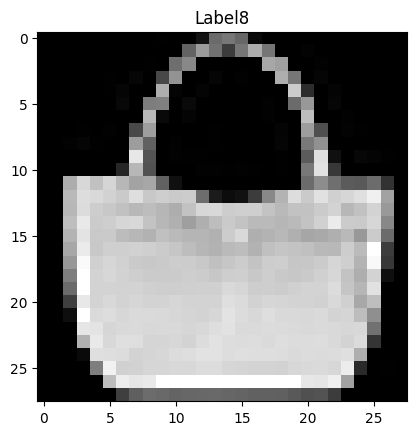

In [ ]:
import matplotlib.pyplot as plt

i=100
plt.imshow(X_train[i], cmap='gray')
plt.title("Label" + str(y_train[i]))
plt.show()


## **Normalizarção dos dados usando a padronização**

Padrozação vai forças os dados centralizados em zero, média = 0 e Desvio Padrão=1.

A importancia da escalabilidade para as redes neurais é ter os dados na mesma escala com o objetico de atualizar os pessos no sentido aonde minimiza essse erro e essa atualização vai ser mais suave sem vies, outro motivo é a inicialização, dos pesos são inicializados aleatoriamente, uma distribuição normal entorno de zero.


**Padronização do conjunto de dados do Treinamento**

In [ ]:
#média do treino
x_mean = X_train.mean()
x_mean

72.94035223214286

In [ ]:
# desvio padrão treino
x_std = X_train.std()
x_std

90.02118235130519

In [ ]:
# Padronização dos dados do treino
X_train_norm = (X_train-x_mean)/x_std

In [ ]:
X_train_norm.std()

1.0

**Padronização do conjunto de dados do Teste**

In [ ]:
#média do teste
X_test.mean()

73.14656658163265

In [ ]:
# desvio padrão treino
X_test.std()

89.87325907809718

In [ ]:
# Padronização dos dados do Teste
X_test_norm = (X_test-x_mean)/x_std

In [ ]:
X_train_norm.std()

1.0

### **2. Treinamento usando apenas camadas totalmente conectadas primeiro**



In [ ]:
from tensorflow.keras.models import Sequential # classe sequencial de camadas para construir o modelo
from tensorflow.keras.layers import Dense, Flatten # 2 tipos de camadas    1) Dense -A camada densamente conectada   2) Flatten -A camada para achatar 28x28 para trasnformar para 1 dimensão

In [ ]:

model = Sequential([
                    Flatten(input_shape=(28, 28)),  # achatar as imagens de 28x28
                    Dense(400, activation='relu'), # camadas ocultas com o relu e 400 neuronios
                    Dense(10, activation='softmax') # 10 classes com softmax como função de  ativação na saida
  ])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 400)               314000    
                                                                 
 dense_1 (Dense)             (None, 10)                4010      
                                                                 
Total params: 318,010
Trainable params: 318,010
Non-trainable params: 0
_________________________________________________________________


### **compilar o modelo**


In [ ]:
# compilar o modelo com a função objetivo ou função de erro ou função de custo e o otimizador

model.compile(optimizer='adam', # otimizador com o algoritmo adam
              loss='sparse_categorical_crossentropy', # função de custo ou de erro,função que a rede neural quer minimizar, como meu y_train são numeros inteiros usei a função sparse_categorical_crossentropy
              metrics=['accuracy'] # avaliar os resultados
              )

### **Treinar o modelo**

In [ ]:
hist = model.fit(X_train_norm,  y_train,
          validation_data=(X_test_norm, y_test),
          epochs=1)

1875/1875 [==============================] - 11s 3ms/step - loss: 0.4495 - accuracy: 0.8368 - val_loss: 0.4071 - val_accuracy: 0.8522


In [ ]:
hist.history

{'loss': [0.4487694799900055, 0.34629762172698975, 0.3129619061946869],
 'accuracy': [0.8380166888237, 0.8722166419029236, 0.8832333087921143],
 'val_loss': [0.4016191065311432, 0.39110493659973145, 0.3782033324241638],
 'val_accuracy': [0.8547999858856201, 0.8580999970436096, 0.8650000095367432]}

<Axes: >

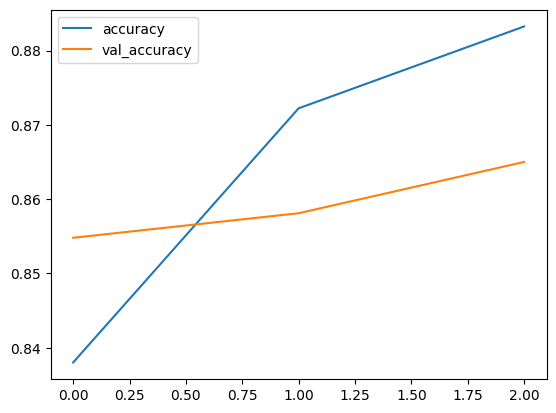

In [ ]:
import pandas as pd
df=pd.DataFrame(hist.history)
df[['accuracy', 'val_accuracy']].plot()

<Axes: >

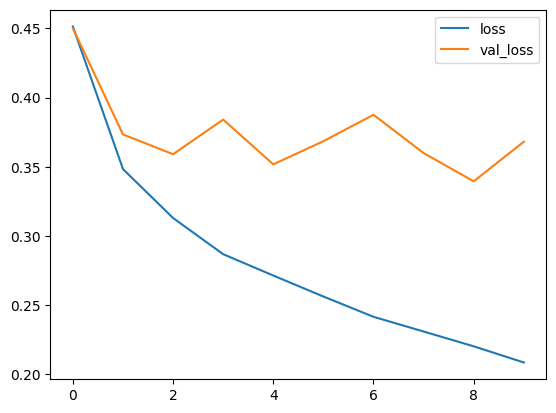

In [ ]:
df[['loss', 'val_loss']].plot() # função de custo

## **Extending to CNNs com Tensorflow**

In [ ]:
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Conv2D # rede convolucional em 2d

model = Sequential([
                    Conv2D(6, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'), #input_shape=(28, 28, 1) = ele vai pedir 3 dim que é a dos canais as cores; numero de filtros=6;tamanho do kernel = kernel_size=(3,3);activation='relu'
                    Flatten(),
                    Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 6)         60        
                                                                 
 flatten (Flatten)           (None, 4056)              0         
                                                                 
 dense (Dense)               (None, 10)                40570     
                                                                 
Total params: 40,630
Trainable params: 40,630
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Conv2D # rede convolucional em 2d

model = Sequential([
                    Conv2D(6, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'),# 2 dim do kernel / entrada 28x28 e saida 26x26
                    MaxPool2D(),# # camada max pooling vai diminuindo pela metade = em seguida ele vai reduzir 26x26 pela metade ficando 13x13 = camada convolucional de max pooling reduzir a dim da imagem pela metade com a implementação de mais filtros por camada
                    Conv2D(16, kernel_size=(3,3), activation='relu'), # passar mais uma vez o filtro convolucional perdendo 2 pixel pela varredura = camada convolucional com 16 filtros
                    MaxPool2D(), # mais um maxpooling para diminuir pela metade /vai reduzir mais uma vez a dim pela metade
                    Flatten(),#  vai achatar
                    Dense(120, activation='relu'),# passar pelas camadas densamente conectadas
                    Dense(100, activation='relu'),
                    Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 6)         60        
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 6)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 16)        880       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 400)               0         
                                                                 
 dense_10 (Dense)            (None, 120)              

In [ ]:
model.compile(optimizer='adam', # otimizador com o algoritmo adam
              loss='sparse_categorical_crossentropy', # função de custo ou de erro,função que a rede neural quer minimizar, como meu y_train são numeros inteiros usei a função sparse_categorical_crossentropy
              metrics=['accuracy'] # avaliar os resultados
              )

In [ ]:
hist = model.fit(X_train_norm,
          y_train,
          validation_data=(X_test_norm, y_test),
          epochs=5)

Epoch 1/5
1875/1875 [==============================] - 15s 5ms/step - loss: 0.4946 - accuracy: 0.8155 - val_loss: 0.3857 - val_accuracy: 0.8616
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3544 - accuracy: 0.8684 - val_loss: 0.3574 - val_accuracy: 0.8695
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3143 - accuracy: 0.8825 - val_loss: 0.3526 - val_accuracy: 0.8684
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2857 - accuracy: 0.8934 - val_loss: 0.3073 - val_accuracy: 0.8876
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2642 - accuracy: 0.9014 - val_loss: 0.3152 - val_accuracy: 0.8830


In [ ]:
x=X_test_norm[0].reshape(1, 28, 28, 1)

In [ ]:
X_train_norm = X_train_norm.reshape(60000, 28, 28,1)
X_test_norm = X_test_norm.reshape(10000, 28, 28,1) # pode colocar -1 no lugare do 100000 para pegar todo o conjunto de teste

In [ ]:
X_test_norm.shape

(10000, 28, 28, 1)

depoois que o mdoelo esta treinado vc pode predizer

1/1 [==============================] - 0s 307ms/step


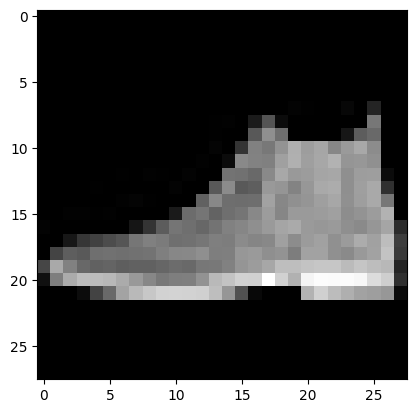

In [ ]:
plt.imshow(x.reshape(28, 28), cmap='gray')
pred = model.predict(x)
idx = pred.argmax()


1/1 [==============================] - 0s 18ms/step


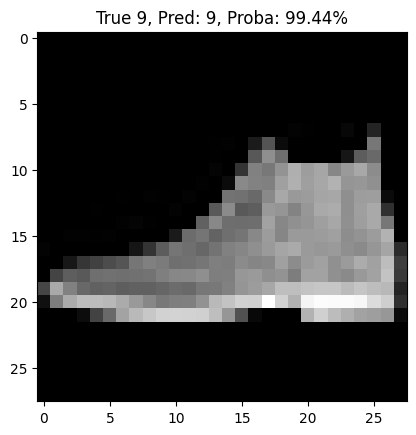

1/1 [==============================] - 0s 18ms/step


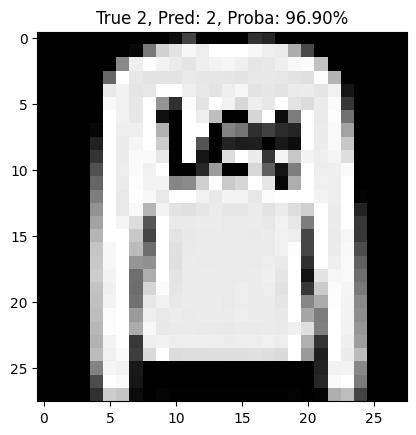

1/1 [==============================] - 0s 32ms/step


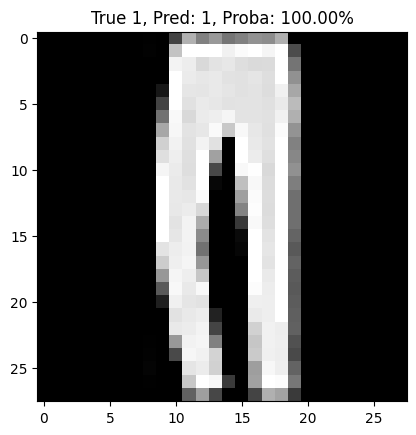

1/1 [==============================] - 0s 28ms/step


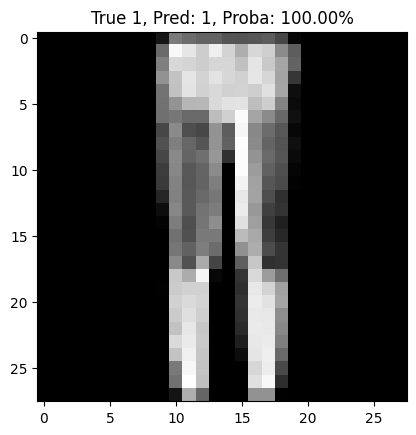

1/1 [==============================] - 0s 28ms/step


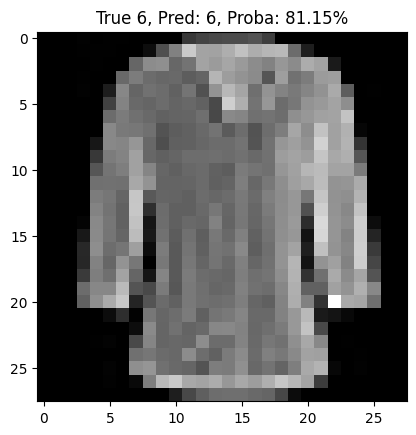

In [ ]:
for idx in range(5):
    x=X_test_norm[idx].reshape(1, 28, 28, 1)
    plt.imshow(x.reshape(28, 28), cmap='gray')
    pred = model.predict(x)
    pred_class = pred.argmax()
    plt.title(f'True {y_test[idx]}, Pred: {pred_class}, Proba: {pred[0][pred_class]*100:.2f}%')
    plt.show()


**olhando outros detalhes na rede**

In [ ]:
model.layers

**vou olhar a 1 camada convoluvional com o indico [0]**

1 camada = <keras.layers.convolutional.conv2d.Conv2D at 0x7a2d12dbd9c0>,

2 camada = <keras.layers.pooling.max_pooling2d.MaxPooling2D at 0x7a2d12dbe560>,

3 camada =<keras.layers.convolutional.conv2d.Conv2D at 0x7a2d12f0b220>,

4 camada =<keras.layers.pooling.max_pooling2d.MaxPooling2D at 0x7a2d12dbdc00>,

5 camada = <keras.layers.reshaping.flatten.Flatten at 0x7a2d12dbe9b0>,

6 camada = <keras.layers.core.dense.Dense at 0x7a2d12dbf3d0>,

7 camada = <keras.layers.core.dense.Dense at 0x7a2d12dbd840>,

8 camada = <keras.layers.core.dense.Dense at 0x7a2d12dbd4b0>]

In [ ]:
# vou olhar a 1 camada convoluvional com o indico [0]
conv = model.layers [0]

In [ ]:
conv.weights [0]

<tf.Variable 'conv2d_6/kernel:0' shape=(3, 3, 1, 6) dtype=float32, numpy=
array([[[[ 0.11056554, -0.03762403,  0.203305  ,  0.38013682,
           0.16076888,  0.0430127 ]],

        [[-0.20138761, -0.10900144, -0.04004975, -0.07458802,
          -0.05406423,  0.19372796]],

        [[-0.39515716, -0.22102611,  0.19645932, -0.30147702,
           0.05213628, -0.3853311 ]]],


       [[[ 0.03295804, -0.2019432 , -0.21805747, -0.3071399 ,
           0.05371992,  0.00799211]],

        [[-0.3066595 , -0.37562603,  0.09621727,  0.1515268 ,
          -0.10926247,  0.4523213 ]],

        [[-0.4600819 , -0.25755265,  0.08838989,  0.27351314,
          -0.18922321, -0.4634895 ]]],


       [[[ 0.1733279 , -0.14249946,  0.05602879, -0.4785775 ,
          -0.10497468,  0.29131794]],

        [[ 0.3520475 , -0.40821433,  0.30222195, -0.0697185 ,
          -0.173626  , -0.09718668]],

        [[-0.02066403, -0.16164403, -0.21456297,  0.42684263,
          -0.4786449 , -0.02591607]]]], dtype=float3

**Usando uma camada convolucional já pre treinada**

ValueError: ignored

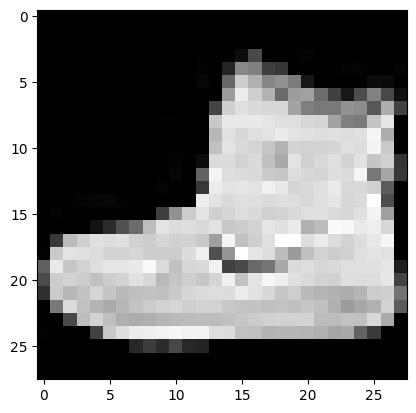

In [ ]:
x=X_train_norm[0].reshape(1, 28, 28, 1)
plt.imshow(X_train_norm[0], cmap='gray')
output_img = conv(x)
output_img = output_img.numpy()
output_img = output_img.reshape(26,26)
plt.imshow(output_img, cmap='gray')
plt.title('output image')
